<a href="https://colab.research.google.com/github/prudhvibhukaya/a_b_testing/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from scipy.stats import norm

In [ ]:
df = pd.read_csv("/content/ab_data.csv")
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [ ]:
df.user_id.nunique()
df.groupby(['group','landing_page']).count()['converted']

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: converted, dtype: int64

In [ ]:
all_conv = "%.4f" % (df.converted.sum() / df.converted.count())

In [ ]:
control_conv = df.query("group == 'control'")['converted'].sum() / df.query("group == 'control'")['converted'].count()
"%.4f" % control_conv

'0.1204'

In [ ]:
treat_conv = df.query("group == 'treatment'")['converted'].sum() / df.query("group == 'treatment'")['converted'].count()
"%.4f" % treat_conv

In [ ]:
p_n = df.query('landing_page == "new_page"').user_id.nunique() / df.user_id.nunique()
"%.4f" % p_n

'0.5035'

In [ ]:
n_new = df.query('landing_page == "new_page" ').count()[0]


In [ ]:
n_old = df.query('landing_page == "old_page" ').count()[0]

144226

144226

In [ ]:
new_converted_simulation = np.random.binomial(n_new, treat_conv, 20000)/n_new

old_converted_simulation = np.random.binomial(n_old, control_conv, 20000)/n_old

p_diffs = new_converted_simulation - old_converted_simulation


(array([  34.,  288., 1391., 3782., 5802., 5333., 2579.,  675.,  106.,
          10.]),
 array([-0.00590876, -0.00498305, -0.00405735, -0.00313164, -0.00220594,
        -0.00128023, -0.00035453,  0.00057118,  0.00149689,  0.00242259,
         0.0033483 ]),
 <BarContainer object of 10 artists>)

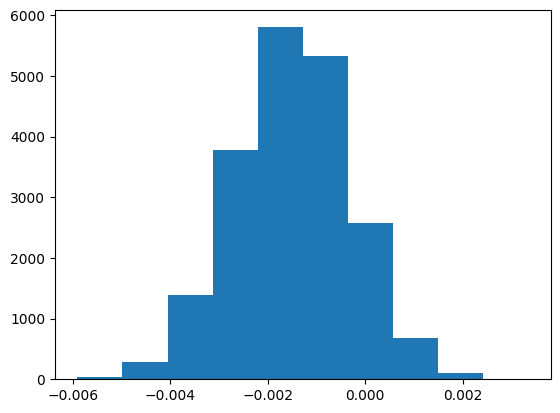

In [ ]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)


In [ ]:
new_convert = df.query('converted == 1 and landing_page == "new_page"').count()[0]/n_new

old_convert = df.query('converted == 1 and landing_page == "old_page"').count()[0]/n_old

obs_diff = new_convert - old_convert


0.91405

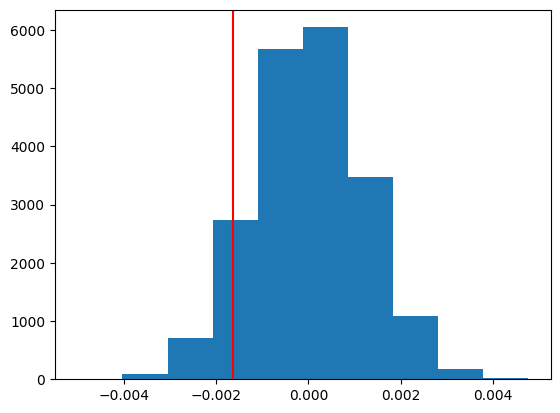

In [ ]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red')

(null_vals > obs_diff).mean()


In [ ]:
convert_old = df.query('converted == 1 and landing_page == "old_page"').count()[0]

convert_new = df.query('converted == 1 and landing_page == "new_page"').count()[0]

n_old = df.query('landing_page == "old_page" ').count()[0]
n_new = df.query('landing_page == "new_page" ').count()[0]

convert_old,convert_new,n_old,n_new

(17739, 17498, 147239, 147239)

In [ ]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]), np.array([n_new,n_old]), alternative = 'larger')

z_score, p_value


(-1.3683341399998907, 0.9143962454534289)

In [ ]:
norm.ppf(1-(0.05/2))

1.959963984540054

In [ ]:
norm.cdf(z_score)

0.08560375454657104

In [ ]:
df['intercept'] = 1

In [ ]:


df[['ab_page','old_page']] = pd.get_dummies(df['landing_page'])


In [ ]:
df.head ()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [ ]:
df = df.drop('old_page', axis = 1)

In [ ]:
log = sm.Logit(df['converted'], df[['intercept', 'ab_page']])
results = log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366242
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 Jan 2024   Pseudo R-squ.:               8.680e-06
Time:                        20:44:03   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1712
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9879      0.008   -248.305      0.000      -2.004      -1.972
ab_page       -0.0155      0.011     -1.368      0.171      -0.038       0.007
==============================================================================
"""

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
convert_old, convert_new, n_old, n_new

(17739, 17498, 147239, 147239)

In [ ]:
p_old = convert_old / n_old
p_new = convert_new / n_new

In [ ]:
se_old = np.sqrt(p_old * (1 - p_old) / n_old)
se_new = np.sqrt(p_new * (1 - p_new) / n_new)

In [ ]:
z_score = 1.96

In [ ]:
margin_error_old = z_score * se_old
margin_error_new = z_score * se_new

In [ ]:
ci_old = (p_old - margin_error_old, p_old + margin_error_old)
ci_new = (p_new - margin_error_new, p_new + margin_error_new)

In [ ]:
print("Confidence Interval for Old Page:", ci_old)
print("Confidence Interval for New Page:", ci_new)

Confidence Interval for Old Page: (0.11881486276627486, 0.12214031894509238)
Confidence Interval for New Page: (0.11718786569635213, 0.12049372681650113)


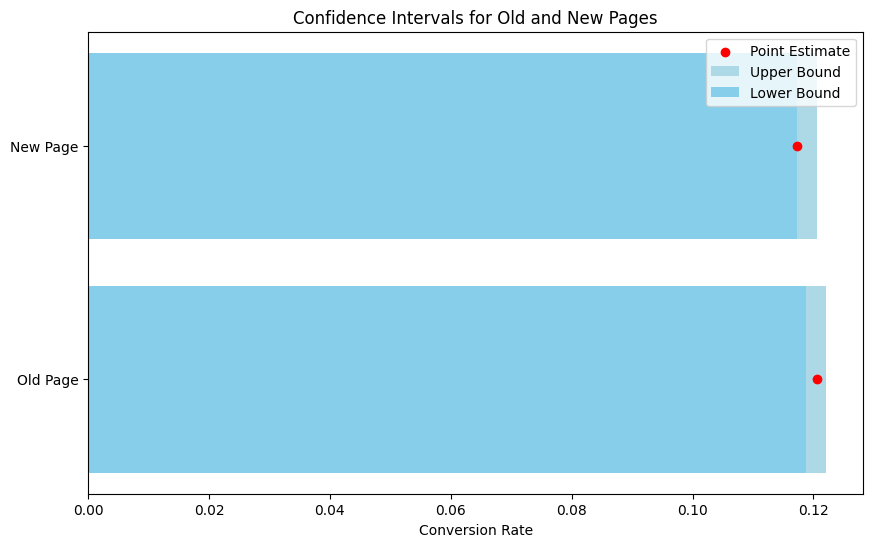

In [ ]:
import matplotlib.pyplot as plt

# Confidence Intervals
old_page_ci = (0.1188, 0.1221)
new_page_ci = (0.1172, 0.1205)

# Page types
page_types = ['Old Page', 'New Page']

# Lower bounds
lower_bounds = [old_page_ci[0], new_page_ci[0]]

# Upper bounds
upper_bounds = [old_page_ci[1], new_page_ci[1]]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot confidence intervals
ax.barh(page_types, upper_bounds, color='lightblue', label='Upper Bound')
ax.barh(page_types, lower_bounds, color='skyblue', label='Lower Bound')

# Highlight the point estimate
ax.scatter([0.1205, 0.1172], page_types, color='red', marker='o', label='Point Estimate')

# Add labels and title
ax.set_xlabel('Conversion Rate')
ax.set_title('Confidence Intervals for Old and New Pages')

# Add legend
ax.legend()

# Display the chart
plt.show()


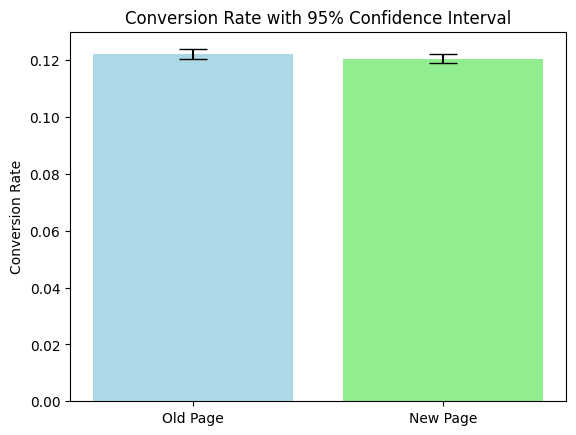

In [ ]:
import matplotlib.pyplot as plt

# Confidence Intervals
ci_old = (0.11881486276627486, 0.12214031894509238)
ci_new = (0.11718786569635213, 0.12049372681650113)

# Plotting
plt.bar(['Old Page', 'New Page'], [ci_old[1], ci_new[1]], yerr=[[ci_old[1]-p_old, ci_new[1]-p_new]], capsize=10, color=['lightblue', 'lightgreen'])
plt.title('Conversion Rate with 95% Confidence Interval')
plt.ylabel('Conversion Rate')
plt.show()


In [ ]:

# Conducting the z-test
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')


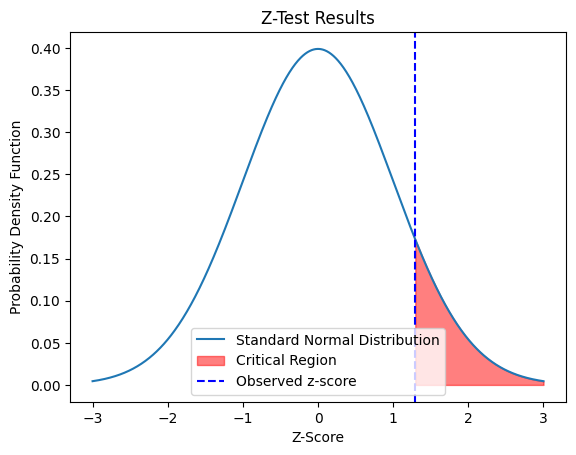

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Observed z-score and p-value from the z-test
observed_z = 1.29  # Replace with your actual observed z-score
p_value = 0.9143962454534289  # Replace with your actual p-value

# Plotting the standard normal distribution
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

plt.plot(x, y, label='Standard Normal Distribution')

# Highlighting the critical region (right side for one-tailed test)
critical_region = x[x > observed_z]
plt.fill_between(critical_region, norm.pdf(critical_region, 0, 1), color='red', alpha=0.5, label='Critical Region')

# Marking the observed z-score
plt.axvline(x=observed_z, color='blue', linestyle='--', label='Observed z-score')

# Adding labels and legend
plt.title('Z-Test Results')
plt.xlabel('Z-Score')
plt.ylabel('Probability Density Function')
plt.legend()

# Displaying the plot
plt.show()
